# Linear Regression

We will be working with some random Dataset created using Numpy. We will be performing a very basic Linear Regression on it

In [12]:
import numpy as np
import matplotlib.pyplot as mpl

# Simple Regression

In [13]:
# Dataset of Values
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [14]:
# Estimate the Regression Coefficients
def estimate_coefficient(x,y):
    # Size of Observations
    n = np.size(x)

    # Mean of Obseravations and Vectors
    m_x = np.mean(x)
    m_y = np.mean(y)

    # Calculating Cross-Deviation and Deviation about x 
    SS_xy = np.sum(y*x) - n * m_x * m_y
    SS_xx = np.sum(x*x) - n * m_x * m_x

    # Calculating Regression Coefficients 
    b_1 = SS_xy / SS_xx
    b_0 = m_y - m_x * b_1

    return (b_0,b_1)

In [15]:
# Represent the Regression Line
def regression_line(x,y,b):
    # Plot the actual points as scatter plot 
    mpl.scatter(x , y , color = "m" , marker = "o" , s = 30)

    # Predicted response vector
    y_pred = b[0] + b[1] * x
    
    # Plot the regression line
    mpl.plot(x , y_pred , color = "g")

    # Putting Labels
    mpl.xlabel('x')
    mpl.ylabel('y')

    # Plot points
    mpl.show()

In [16]:
b = estimate_coefficient(x , y)
print("Estimated Coefficient : b_0 = {} b_1 = {}".format(b[0] , b[1]))

Estimated Coefficient : b_0 = 1.2363636363636363 b_1 = 1.1696969696969697


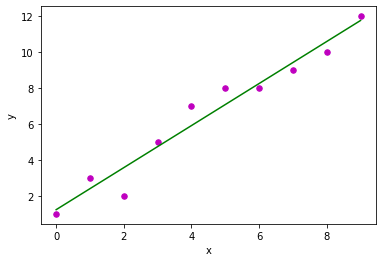

In [18]:
regression_line(x , y ,b)

# Multiple Linear Regression

In [19]:
from sklearn import datasets , linear_model , metrics 

In [22]:
dataset = datasets.load_boston(return_X_y = False)
dataset

# Get the Feature matrix and Response vec
X = dataset.data
Y = dataset.target

In [23]:
from sklearn.model_selection import train_test_split
# Spilt the Data into Training and Testing data 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.4 , random_state = 1)    

In [25]:
# Instantiate the Linear Regession Model
regression = linear_model.LinearRegression()

# Fit the Training data into the model and train the model
regression.fit(X_train , Y_train)

print("Regression Co-Efficients : ", regression.coef_)
print("Varaince Score : " , regression.score(X_test , Y_test))

Regression Co-Efficients :  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Varaince Score :  0.7209056672661739


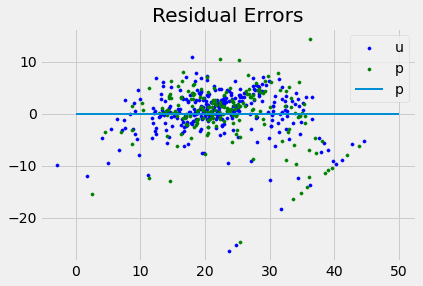

In [32]:
mpl.style.use("fivethirtyeight")

# Plotting Residual errors in Training Data
mpl.scatter(regression.predict(X_train) , regression.predict(X_train) - Y_train , color = "blue" , s = 10 , label = "Train Data")

# Plotting Residual errors in Test Data
mpl.scatter(regression.predict(X_test) , regression.predict(X_test) - Y_test , color = "green" , s = 10 , label = "Test Data")

# Plotting line for zero Residual error
mpl.hlines(y = 0 , xmin = 0 , xmax = 50 , linewidth = 2)
mpl.legend("upper right")

# Residual Errors
mpl.title("Residual Errors")
mpl.show()